In [ ]:
import pandas as pd
import numpy as nnp
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Set style
sns.set(style='whitegrid')

Step-By-Step plan
step:1 Load and inspect the dataset
step:2 clean and preprocess the data
step:3 Analyize funding trends over time
step:4 Identity top funded sectors,cities,startups
step:5 Analyize investor behavior
step:6 Analyize investment types and stages
step:7 Correlation analysis
step:8 Identify

In [ ]:
#step:1 Load and inspect the dataset
def readcsv(filepath,filename):
  import os
  os.chdir(filepath)
  df = pd.read_excel(filename)
  return df

filepath = "/content/drive/MyDrive/Colab Notebooks"
filename = "startup_funding123.xlsx"
df = readcsv(filepath,filename)


In [ ]:
#inspect first few rows
print("first 5 rows:")
print(df.head())

#Basic info
print("\nDataset Info:")
print(df.info())

#check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

first 5 rows:
   SNo                 Date   StartupName  Industry_Vertical  \
0    0  2017-01-08 00:00:00      TouchKin         Technology   
1    1  2017-02-08 00:00:00       Ethinos         Technology   
2    2  2017-02-08 00:00:00  Leverage Edu  Consumer Internet   
3    3  2017-02-08 00:00:00          Zepo  Consumer Internet   
4    4  2017-02-08 00:00:00  Click2Clinic  Consumer Internet   

                                     SubVertical City_Location  \
0                       Predictive Care Platform     Bangalore   
1                       Digital Marketing Agency        Mumbai   
2  Online platform for Higher Education Services     New Delhi   
3                         DIY Ecommerce platform        Mumbai   
4                  healthcare service aggregator     Hyderabad   

                                      Investors_Name  InvestmentType  \
0                                        Kae Capital  Private Equity   
1                         Triton Investment Advisors  Privat

In [ ]:
df.columns

Index(['SNo', 'Date', 'StartupName', 'Industry_Vertical', 'SubVertical',
       'City_Location', 'Investors_Name', 'InvestmentType', 'Amount_In_INR',
       'Remarks'],
      dtype='object')

In [ ]:
#fill Missing values
df['Industry_Vertical'] = df['Industry_Vertical'].fillna('Others')
df['SubVertical'] = df['SubVertical'].fillna('Not Specified')
df['City_Location'] = df['City_Location'].fillna('Not Specified')
df['Investors_Name'] = df['Investors_Name'].fillna('Not Specified')

In [ ]:
#Convert data columns to datatime and extract year/month
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [ ]:
#Apply the function to the Next Column
df['Amount_In_INR'] = df['Amount_In_INR'].fillna(df['Amount_In_INR'].median())

In [ ]:
#Save column data
df.to_csv("cleaned_startup_funding.csv", index=False)

Step :3 Funding Trends over time
Objective: Analyze how funding has evolved year-over-year and month-over-month
Explanation:
.A countplot shows the number of funding deals over the years.
.A line plot shows total funding amount per year, helping growth or decline trends.

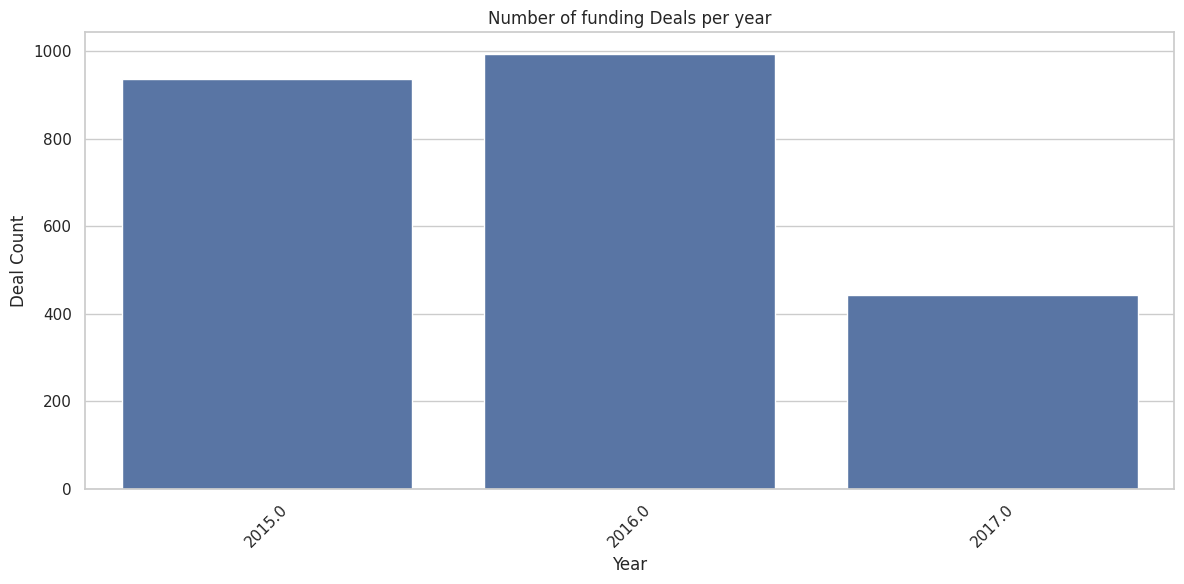

In [ ]:
#Number of deals per year
plt.figure(figsize=(12,6))
sns.countplot(x='Year', data=df)
plt.title("Number of funding Deals per year")
plt.xlabel("Year")
plt.ylabel("Deal Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

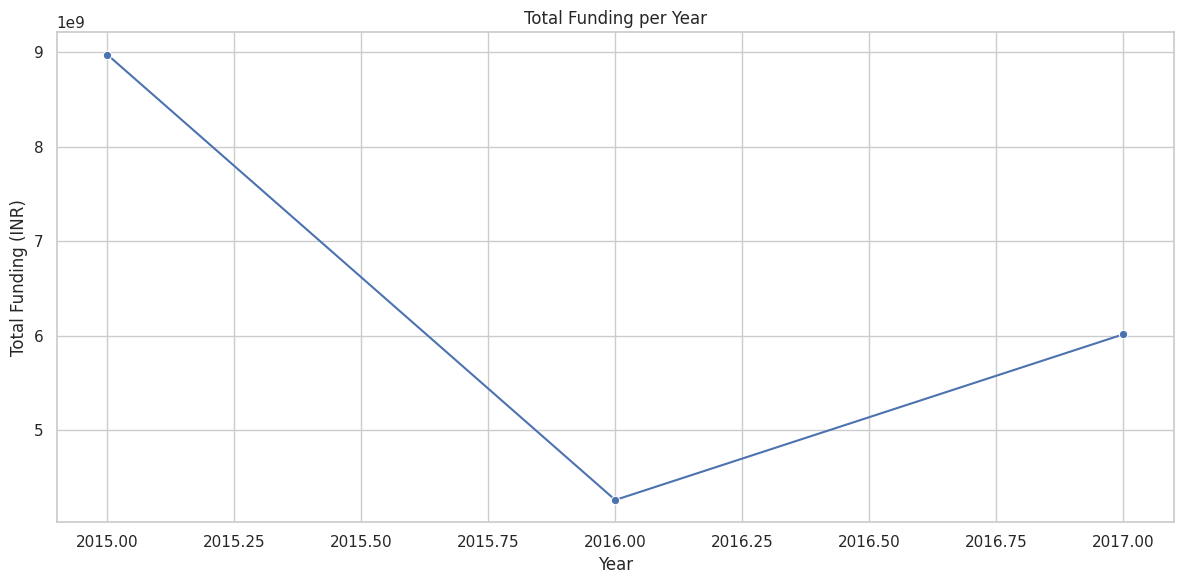

In [ ]:
#Total funding per year
yearly_funding = df.groupby('Year')['Amount_In_INR'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='Amount_In_INR', data=yearly_funding, marker='o')
plt.xlabel("Year")
plt.title("Total Funding per Year")
plt.ylabel("Total Funding (INR)")
plt.grid(True)
plt.tight_layout()
plt.show()

Step :4 Top Funded sectors cities, and startups


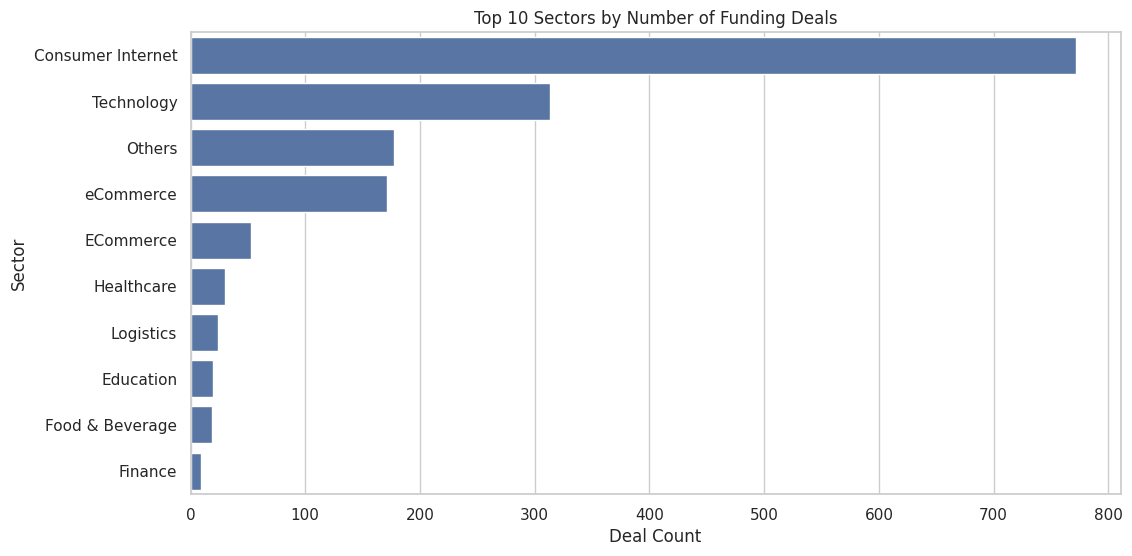

In [ ]:
#Top Sectors by deal count
top_sectors = df['Industry_Vertical'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_sectors.values, y=top_sectors.index)
plt.title("Top 10 Sectors by Number of Funding Deals")
plt.xlabel("Deal Count")
plt.ylabel("Sector")
plt.show()

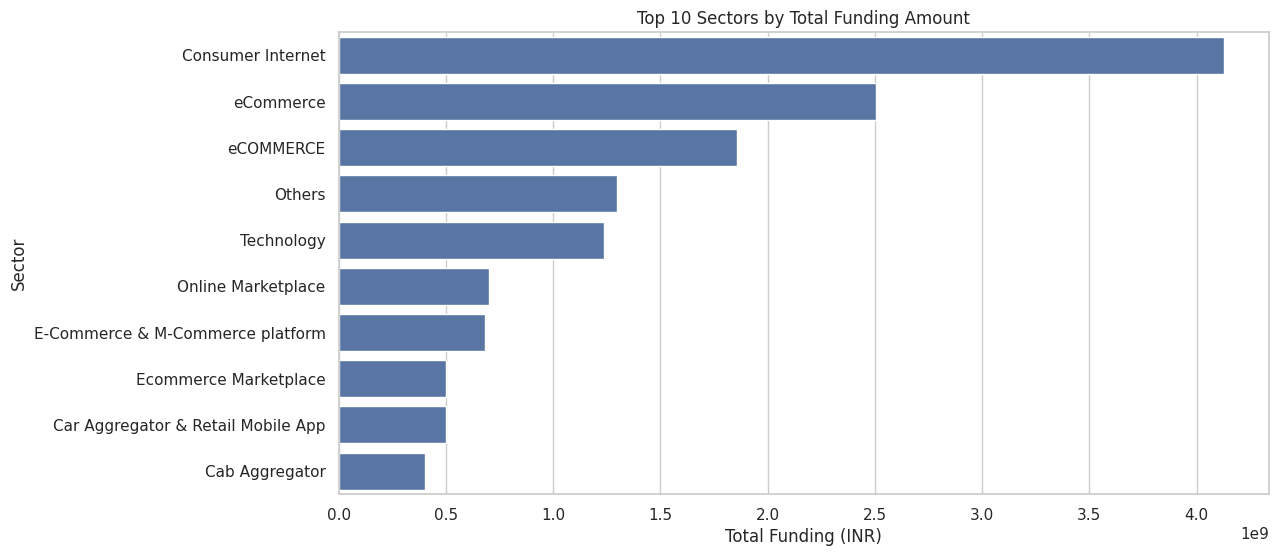

In [ ]:
#Top sectors by total funding
df['Industry_Vertical'] = df['Industry_Vertical'].replace({'ECommerce': 'eCOMMERCE'})
sector_funding = df.groupby('Industry_Vertical')['Amount_In_INR'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=sector_funding.values, y=sector_funding.index)
plt.title("Top 10 Sectors by Total Funding Amount")
plt.xlabel("Total Funding (INR)")
plt.ylabel("Sector")
plt.show()

step:5 Investors Analysis :

Expalnation:

. Investors are into individual names

. Top investors are identified by number of deals and total funding

In [ ]:
#Split multiple investors and count
investors_df = df[['StartupName','Investors_Name','Amount_In_INR']].copy()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.split(',')
investors_df = investors_df.explode('Investors_Name').dropna()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.strip().str.title()


In [ ]:
#investors_df

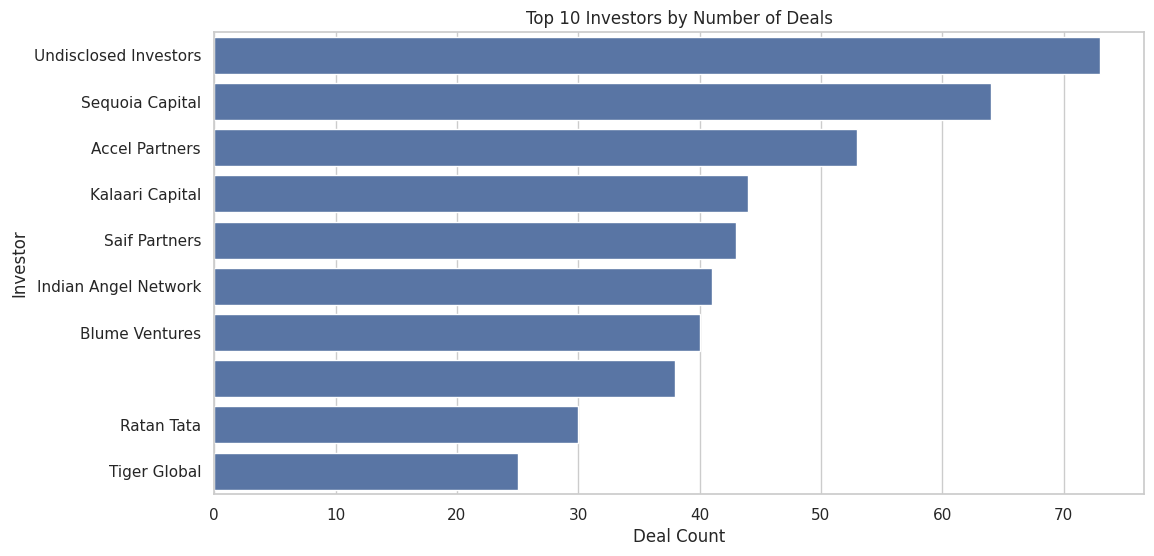

In [ ]:
#top investors by number of deals
top_investors_deals = investors_df['Investors_Name'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_investors_deals.values, y=top_investors_deals.index)
plt.title("Top 10 Investors by Number of Deals")
plt.xlabel("Deal Count")
plt.ylabel("Investor")
plt.show()

step:6  Investment Type Analysis


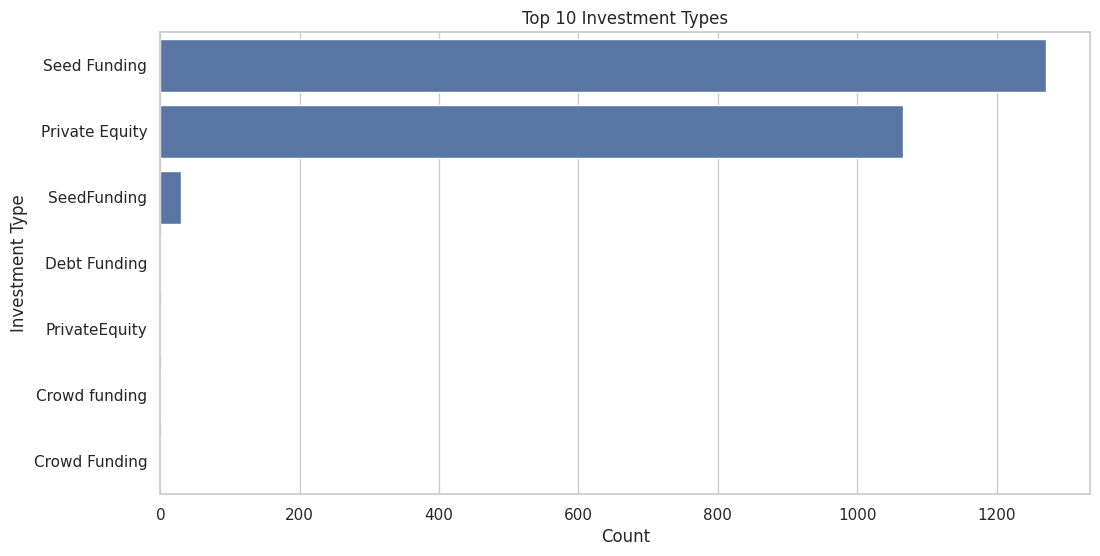

In [ ]:
investment_type = df['InvestmentType'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=investment_type.values, y=investment_type.index)
plt.title("Top 10 Investment Types")
plt.xlabel("Count")
plt.ylabel("Investment Type")
plt.show()

Step : 7 Correlation Between Sectors and Investment Type

Objective: See which sectors attract which type of funding

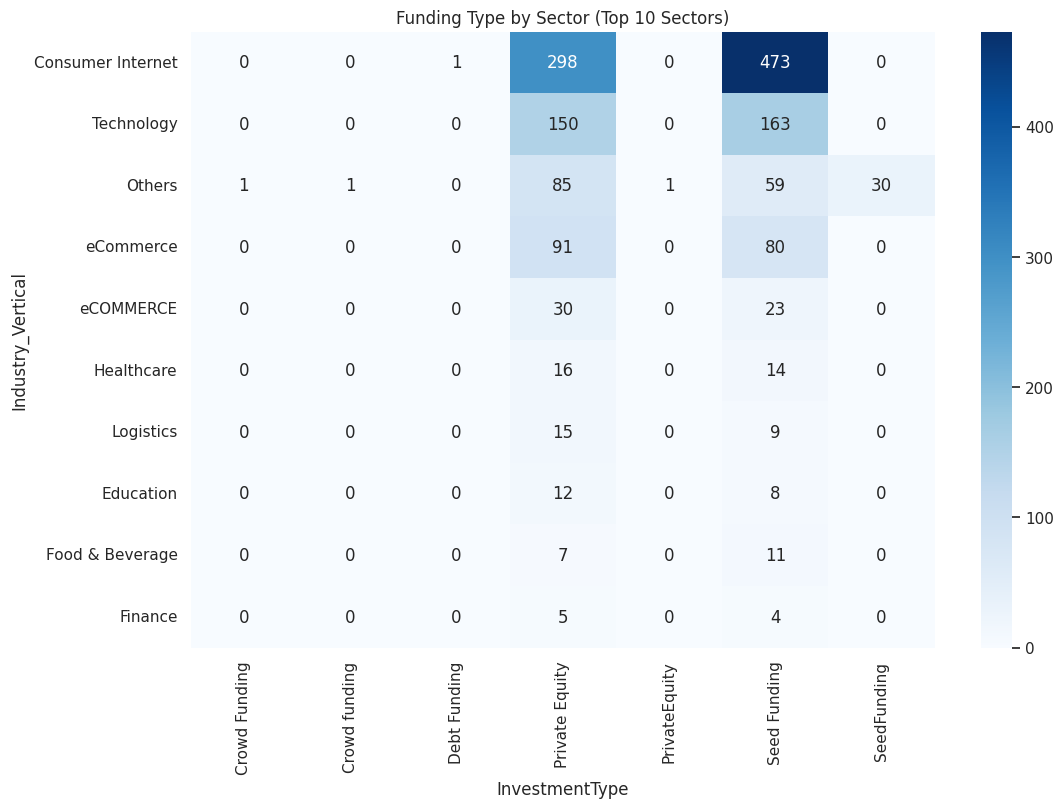

In [ ]:
sector_stage = pd.crosstab(df['Industry_Vertical'], df['InvestmentType'])
sector_stage = sector_stage.loc[sector_stage.sum(axis=1).sort_values(ascending=False).head(10).index]
plt.figure(figsize=(12,8))
sns.heatmap(sector_stage, annot=True,fmt='d', cmap='Blues')
plt.title("Funding Type by Sector (Top 10 Sectors)")
plt.show()

step :8 Funding Distribution and Outliers

Objective:Understand how funding is distributed and identify outliers

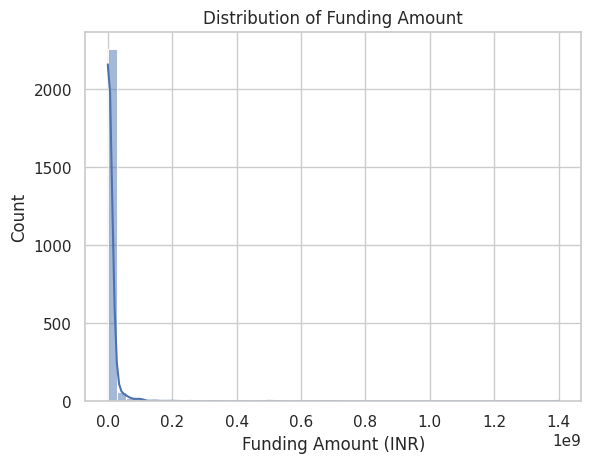

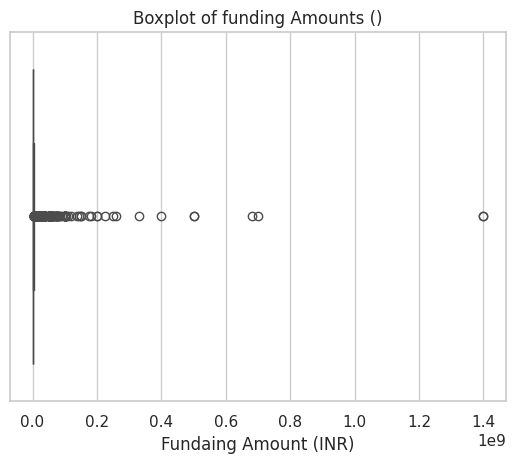

In [ ]:
import seaborn as sns
sns.histplot(df['Amount_In_INR'], bins=50, kde=True)
plt.title("Distribution of Funding Amount")
plt.xlabel("Funding Amount (INR)")
plt.show()

sns.boxplot(x=df['Amount_In_INR'])
plt.title("Boxplot of funding Amounts ()")
plt.xlabel("Fundaing Amount (INR)")
plt.show()

step :9 Growth Trend of Top Sectors




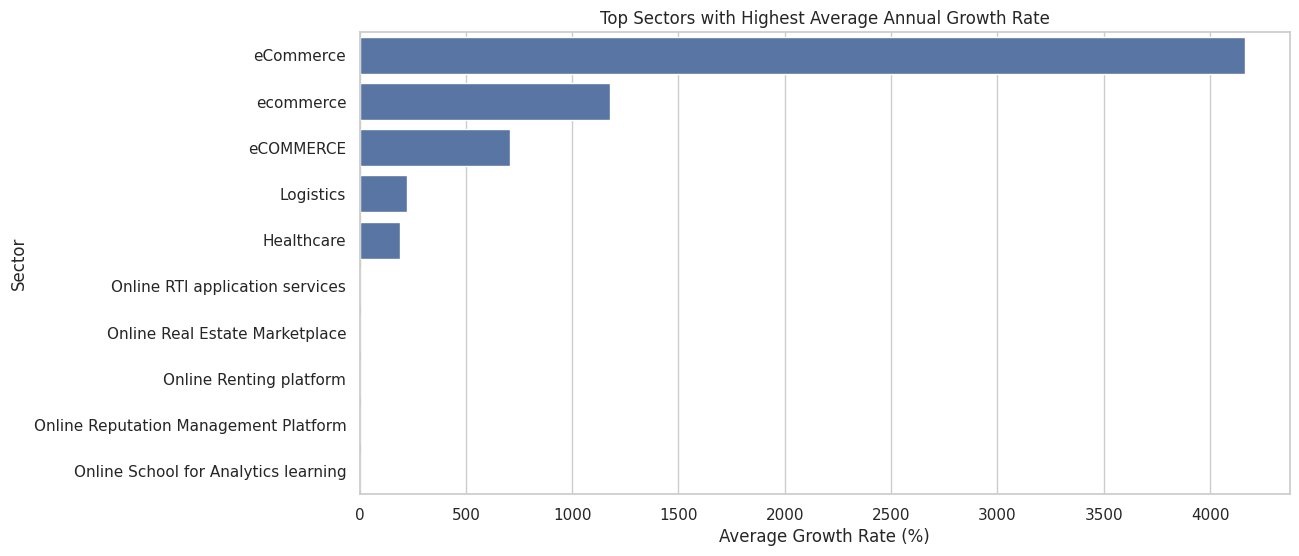

In [ ]:
sector_yearly = df.groupby(['Year', 'Industry_Vertical'])['Amount_In_INR'].sum().unstack()# .fillna(0)
sector_growth = sector_yearly.pct_change().mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=sector_growth.values * 100, y=sector_growth.index)
plt.title("Top Sectors with Highest Average Annual Growth Rate")
plt.xlabel("Average Growth Rate (%)")
plt.ylabel("Sector")
plt.show()

In [ ]:
investors_df = df[['StartupName','Investors_Name','Amount_In_INR']].copy()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.split(',')
investors_df = investors_df.explode('Investors_Name').dropna()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.strip().str.title()

In [ ]:
def classify_investor(name):
    name = name.lower()
    if any(word in name for word in ['capital','ventures','partners','fund','vc','labs']):
      return 'VC'
    elif any(word in name for word in ['angel','network']):
      return 'Angel'
    elif any(word in name for word in ['crop','limited','pvt','ltd','lnc']):
      return 'Corporate'
    else:
       return 'Other'

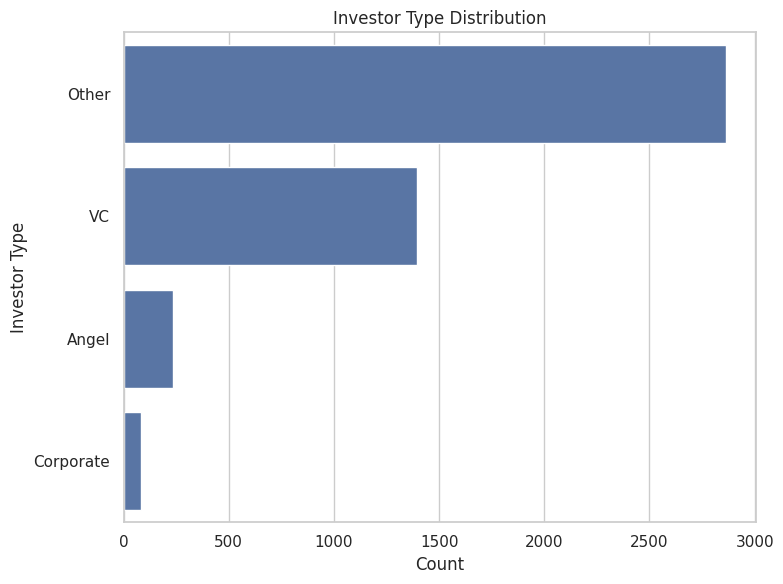

In [ ]:
investors_df['Investor_Type'] = investors_df['Investors_Name'].apply(classify_investor)
investor_type_counts = investors_df['Investor_Type'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(x=investor_type_counts.values, y=investor_type_counts.index)
plt.title("Investor Type Distribution")
plt.xlabel("Count")
plt.ylabel("Investor Type")
plt.tight_layout()
plt.show()

2 startup Funding Trajectoy

3 Repeat investment Analysis

Goal: Identify investors who many startup are funding

In [ ]:
investors_df = df[['StartupName','Investors_Name','Amount_In_INR']].copy()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.split(',')
investors_df = investors_df.explode('Investors_Name').dropna()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.strip().str.title()

In [ ]:
#count how many times an investor in the startup
investor_startup_count = investors_df.groupby(['Investors_Name','StartupName']).size().reset_index(name='Dev')
repeat_investors = investor_startup_count[investor_startup_count['Dev'] > 1]

repeat_investors_summary = repeat_investors.groupby('Investors_Name')['Dev'].sum().sort_values(ascending=False).head(10)

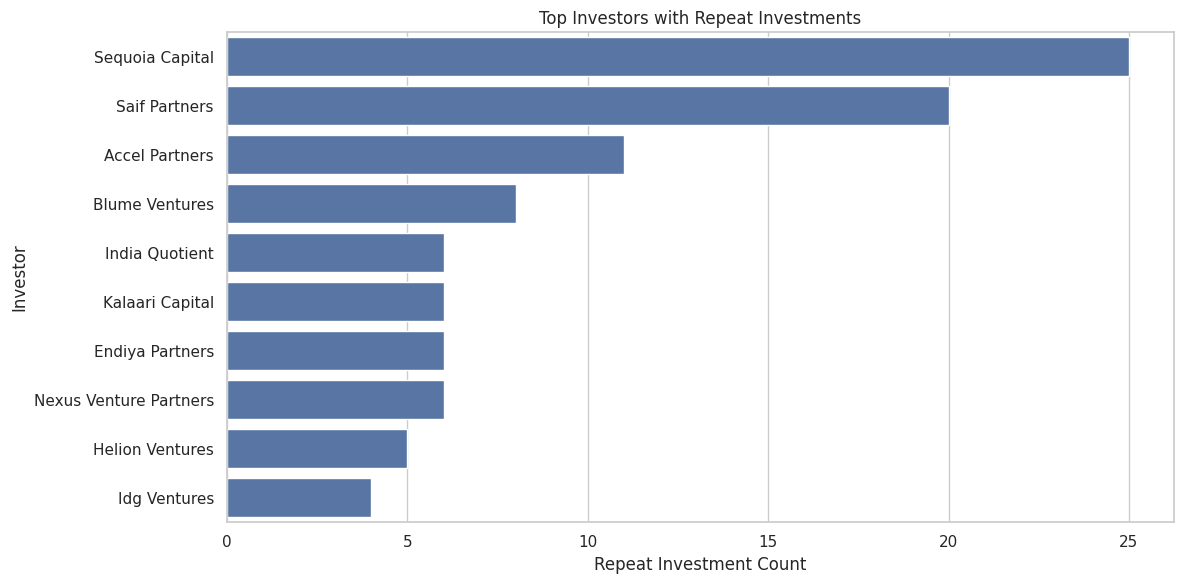

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=repeat_investors_summary.values, y=repeat_investors_summary.index)
plt.title("Top Investors with Repeat Investments")
plt.xlabel("Repeat Investment Count")
plt.ylabel("Investor")
plt.tight_layout()
plt.show()

Funding Stage Analysis

Objective: Understand how many startup are in early satge vs late stage

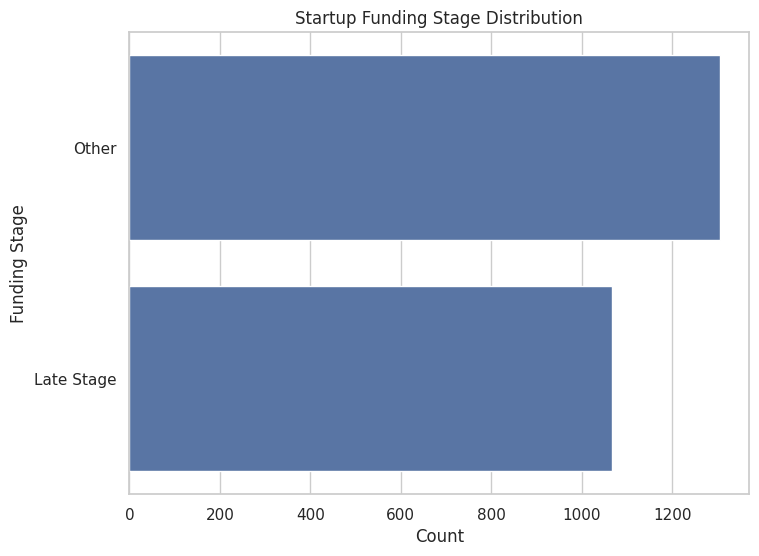

In [ ]:
#Define stage categories
early_stage = ['Seed','Pre-Seed','Angel']
late_stage = ['Series A','Series B','Series C','Series D','Series E','Private Equity','Venture Debt','Debt Funding']

df['Funding_Stage'] = df['InvestmentType'].str.strip().str.title()
df['Funding_Stage'] = df['Funding_Stage'].apply(lambda x: 'Early Stage' if x in early_stage else ('Late Stage' if x in late_stage else 'Other'))

#plot
plt.figure(figsize=(8,6))
sns.countplot(y='Funding_Stage', data=df, order=df['Funding_Stage'].value_counts().index)
plt.title("Startup Funding Stage Distribution")
plt.xlabel("Count")
plt.ylabel("Funding Stage")
plt.show()

Funding Type Vs Sector

Objective: Understand which investment types are most common in each sector

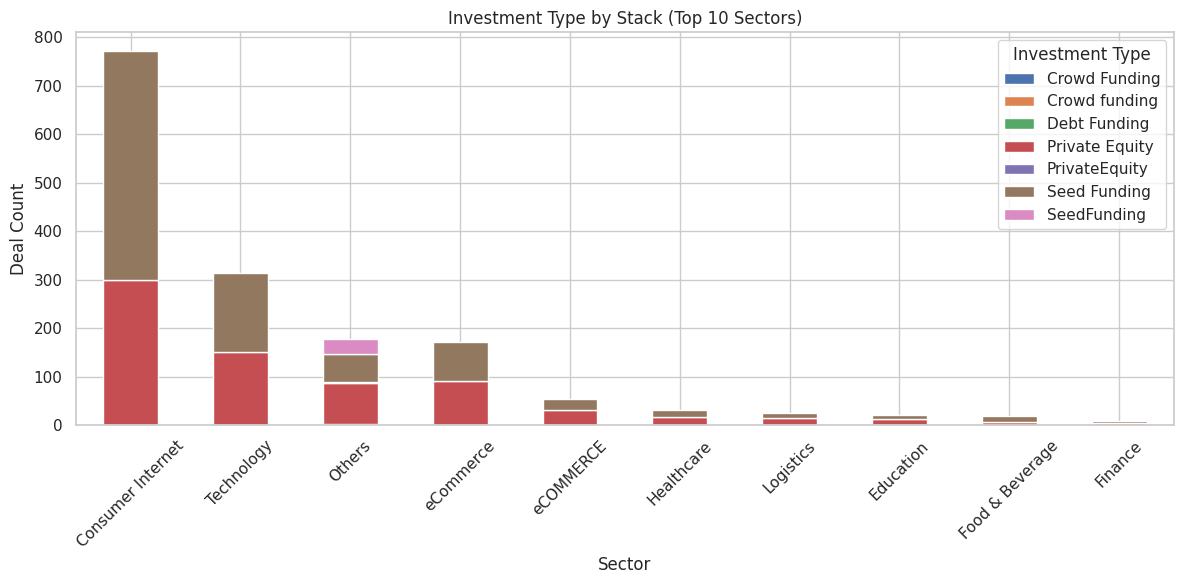

In [ ]:
sector_stage = pd.crosstab(df['Industry_Vertical'], df['InvestmentType'])
sector_stage = sector_stage.loc[sector_stage.sum(axis=1).sort_values(ascending=False).head(10).index]

sector_stage.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Investment Type by Stack (Top 10 Sectors)")
plt.xlabel("Sector")
plt.ylabel("Deal Count")
plt.xticks(rotation=45)
plt.legend(title='Investment Type')
plt.tight_layout()
plt.show()